# Modeling

### Library & Data Imports

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')

from bg_functions import *

In [2]:
data = pd.read_csv('final_data.csv', index_col=0)
data.head()

,name,year_published,min_players,max_players,playing_time,min_age,average_rating,average_weight,category_abstract_strategy,category_action_/_dexterity,...,mechanic_time_track,mechanic_trading,mechanic_trick-taking,mechanic_variable_phase_order,mechanic_variable_player_powers,mechanic_voting,mechanic_worker_placement,category_historical,category_culture,mechanic_movement
0,"Warhammer 40,000: Heroes of Black Reach",2018.0,2.0,2.0,120.0,14.0,7.63636,1.91252,0,0,...,0,0,0,0,0,0,0,0,0,1
1,The Russo-Georgian War of 2008,2010.0,1.0,2.0,90.0,12.0,7.22222,3.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Frher oder Spter,2009.0,2.0,5.0,30.0,8.0,4.50000,1.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Wings Over France,1992.0,1.0,1.0,60.0,10.0,7.50000,3.22220,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Mothra vs. Godzilla,1982.0,2.0,2.0,90.0,10.0,6.98143,1.50000,0,0,...,0,0,0,0,0,0,0,0,1,0


### Setup

In [3]:
y = data['average_rating']
X = data.drop(['name', 'average_rating'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Baseline Model

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
base_preds = lr.predict(X_test)
print('Base MSE:', mean_squared_error(y_test, base_preds))
print('Base R^2 Score:', r2_score(y_test, base_preds))

Base MSE: 1.5854491022049808
Base R^2 Score: 0.21685720352690874


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
lr.fit(X_train_scaled, y_train)
base_preds = lr.predict(X_test_scaled)
print('Base MSE:', mean_squared_error(y_test, base_preds))
print('Base R^2 Score:', r2_score(y_test, base_preds))

Base MSE: 1.5854491022049804
Base R^2 Score: 0.21685720352690896


### Model Improvement Testing

In [8]:
lasso = LassoCV(cv=5)
create_model(lasso, X_train_scaled, y_train, X_test_scaled, y_test)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
MSE: 1.5853336267080753
R2: 0.2169142433924237


In [9]:
ridge = RidgeCV()
create_model(ridge, X_train_scaled, y_train, X_test_scaled, y_test)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
MSE: 1.5854458239079268
R2: 0.21685882286285518


In [10]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
create_model(forest, X_train_scaled, y_train, X_test_scaled, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
MSE: 1.3880139331356636
R2: 0.3143815770385171


In [11]:
gradient = GradientBoostingRegressor()
create_model(gradient, X_train_scaled, y_train, X_test_scaled, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
MSE: 1.3397322786438657
R2: 0.3382306112739696


In [13]:
grid_forest = RandomForestRegressor()
forest_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 2, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
gridsearch_model(grid_forest, X_train_scaled, y_train, X_test_scaled,
                 y_test, forest_params, title='Random Forest Gridsearch',
                 verbose=3)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, n_estimators=10, score=0.26753885600032956, total=   2.5s
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, n_estimators=10, score=0.2682014038899436, total=   2.7s
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, n_estimators=10, score=0.2416030460307309, total=   2.6s
[CV] max_depth=None, max_features=auto, n_estimators=50 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=50, score=0.31385359494867593, total=  13.0s
[CV] max_depth=None, max_features=auto, n_estimators=50 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=50, score=0.31944991405872225, total=  13.0s
[CV] max_depth=None, max_features=auto, n_estimators=50 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=50, score=0.29920992687326786, total=  12.9s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, score=0.3168794581245139, total=  26.1s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, score=0.326202774031088, total=  29.0s
[CV] max_depth=None, max_features=auto, n_estimators=

[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=0.1314453485415885, total=   0.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=0.1370204038878925, total=   0.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=0.13308392743127828, total=   0.7s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................
[CV]  max_depth=2, max_features=log2, n_estimators=10, score=0.08127864286628195, total=   0.1s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................
[CV]  max_depth=2, max_features=log2, n_estimators=10, score=0.10275057818141398, total=   0.0s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................
[CV]  max_depth=2, max_features=log2, n_estimators=10, score=0.08911814924841799, total=   0.0s
[CV] max_depth=2, max_features=log2, n_estimators=50 ...............

[CV]  max_depth=4, max_features=None, n_estimators=10, score=0.2778779359464113, total=   0.9s
[CV] max_depth=4, max_features=None, n_estimators=50 .................
[CV]  max_depth=4, max_features=None, n_estimators=50, score=0.29151586444681954, total=   4.2s
[CV] max_depth=4, max_features=None, n_estimators=50 .................
[CV]  max_depth=4, max_features=None, n_estimators=50, score=0.2991310869492597, total=   4.5s
[CV] max_depth=4, max_features=None, n_estimators=50 .................
[CV]  max_depth=4, max_features=None, n_estimators=50, score=0.27630988297212133, total=   4.3s
[CV] max_depth=4, max_features=None, n_estimators=100 ................
[CV]  max_depth=4, max_features=None, n_estimators=100, score=0.291029401280956, total=   8.5s
[CV] max_depth=4, max_features=None, n_estimators=100 ................
[CV]  max_depth=4, max_features=None, n_estimators=100, score=0.3007972927661495, total=   8.7s
[CV] max_depth=4, max_features=None, n_estimators=100 ................
[

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 11.1min finished


Random Forest Gridsearch
BEST PARAMS:
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

Best R2 Score: 0.3391


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
final_forest = RandomForestRegressor(n_estimators=100, max_depth=None,
                                     max_features='sqrt', random_state=42)
create_model(final_forest, X_train_scaled, y_train, X_test_scaled, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Training MSE: 0.20132696400586086
Testing MSE: 1.3409344569927046
Training R2: 0.9029311032660161
Testing R2: 0.33763678753490434


In [18]:
grid_gradient = GradientBoostingRegressor()
gradient_params = {
    'learning_rate': [0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 5],
    'max_features': ['auto', 'sqrt', None]
}
gridsearch_model(grid_gradient, X_train_scaled, y_train, X_test_scaled,
                 y_test, gradient_params, title='Gradient Boosting Gridsearch',
                 verbose=5)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=50, score=-0.21761966713421743, total=11.6min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.6min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=50, score=-0.21962561082336896, total=11.8min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 23.4min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=50, score=-0.20420889111919793, total=11.7min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 35.0min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=100, score=-0.22440115650869497, total=17.5min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 52.5min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=100, score=-0.2256465860748258, total=16.0min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=100, score=-0.2078828688849228, total=13.5min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=200, score=-0.22316969253186647, total=20.0min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=200, score=-0.22334493874685046, total=19.8min
[CV] learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=None, max_features=auto, n_estimators=200, score=-0.21178799982519947, total=19.3min
[CV] learning_rate=0.1, max_depth=None, max_features=sqrt, n_estimators=50 
[CV]  learning_rat

[CV]  learning_rate=0.1, max_depth=2, max_features=None, n_estimators=50, score=0.30384646334602816, total=   3.3s
[CV] learning_rate=0.1, max_depth=2, max_features=None, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, max_features=None, n_estimators=100, score=0.3329231713472781, total=   6.5s
[CV] learning_rate=0.1, max_depth=2, max_features=None, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, max_features=None, n_estimators=100, score=0.3411892813862293, total=   6.6s
[CV] learning_rate=0.1, max_depth=2, max_features=None, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, max_features=None, n_estimators=100, score=0.3210284303165003, total=   6.5s
[CV] learning_rate=0.1, max_depth=2, max_features=None, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, max_features=None, n_estimators=200, score=0.3438203853119114, total=  12.6s
[CV] learning_rate=0.1, max_depth=2, max_features=None, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, max_features=None

[CV]  learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=50, score=0.12052678033854602, total=  51.9s
[CV] learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=50 
[CV]  learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=50, score=0.10480441635640125, total=  53.3s
[CV] learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=100, score=0.11807877754914531, total= 1.2min
[CV] learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=100, score=0.12520685218219763, total= 1.2min
[CV] learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=100, score=0.11141290565748307, total= 1.1min
[CV] learning_rate=0.5, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  learning_rate=0.5

[CV]  learning_rate=0.5, max_depth=2, max_features=None, n_estimators=200, score=0.33821556835256805, total=  12.4s
[CV] learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=50 
[CV]  learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=50, score=0.3374802745215809, total=   9.4s
[CV] learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=50 
[CV]  learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=50, score=0.336477970788573, total=   9.3s
[CV] learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=50 
[CV]  learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=50, score=0.3225621700174135, total=   9.5s
[CV] learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=100, score=0.32710083717795413, total=  19.1s
[CV] learning_rate=0.5, max_depth=5, max_features=auto, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=5, max_features=auto, n_e

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 446.2min finished


Gradient Boosting Gridsearch
BEST PARAMS:
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}

Best R2 Score: 0.3566


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [14]:
grid_gradient = GradientBoostingRegressor()
gradient_params = {
    'learning_rate': [0.1, 0.5],
    'n_estimators': [100, 200],
    'max_depth': [2, 5],
    'max_features': ['auto', 'sqrt']
}
gridsearch_model(grid_gradient, X_train_scaled, y_train, X_test_scaled,
                 y_test, gradient_params, scoring='neg_mean_squared_error',
                 title='Gradient Boosting Gridsearch', verbose=5)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=100, score=-1.3870619576681833, total=   8.5s
[CV] learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=100, score=-1.3737415064912444, total=   8.3s
[CV] learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=100, score=-1.3971100844370534, total=   8.0s
[CV] learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=200, score=-1.3644032318877644, total=  15.9s
[CV] learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   41.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=200, score=-1.352247456999139, total=  15.5s
[CV] learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, max_features=auto, n_estimators=200, score=-1.3764069409960746, total=  15.3s
[CV] learning_rate=0.1, max_depth=2, max_features=sqrt, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, max_features=sqrt, n_estimators=100, score=-1.4511347905117844, total=   1.2s
[CV] learning_rate=0.1, max_depth=2, max_features=sqrt, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, max_features=sqrt, n_estimators=100, score=-1.414351719954857, total=   1.3s
[CV] learning_rate=0.1, max_depth=2, max_features=sqrt, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, max_features=sqrt, n_estimators=100, score=-1.4303110972073922, total=   1.2s
[CV] learning_rate=0.1, max_depth=2, max_features=sqrt, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, max_features=s

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 11.1min finished


Gradient Boosting Gridsearch
BEST PARAMS:
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}

Best Neg_mean_squared_error Score: -1.3356


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [9]:
final_gradient = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                           max_depth=2, max_features='auto')
create_model(final_gradient, X_train_scaled, y_train, X_test_scaled, y_test,
             score=['RMSE', 'R2'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Training RMSE: 1.1594739521228379
Testing RMSE: 1.157933273898149
Training R2: 0.3518132603192613
Testing R2: 0.337698527245457


In [12]:
y_pred = final_gradient.predict(X_test_scaled)

Text(0, 0.5, '')

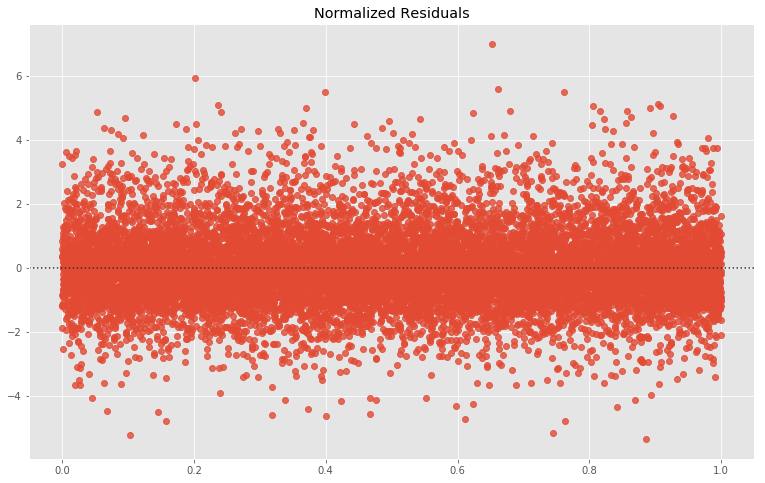

In [40]:
residuals = y_pred - y_test
plt.figure(figsize=(13, 8))
sns.residplot(np.linspace(0, 1, len(residuals)), residuals)
plt.title('Normalized Residuals')
plt.ylabel('')

Text(0.5, 0, '')

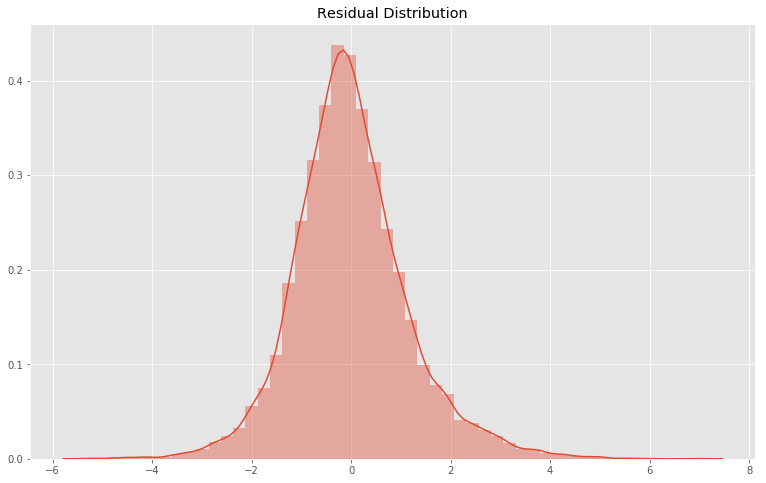

In [41]:
plt.figure(figsize=(13, 8))
sns.distplot(residuals)
plt.title('Residual Distribution')
plt.xlabel('')

Text(0.5, 1.0, 'Predicted Values vs Actual Values')

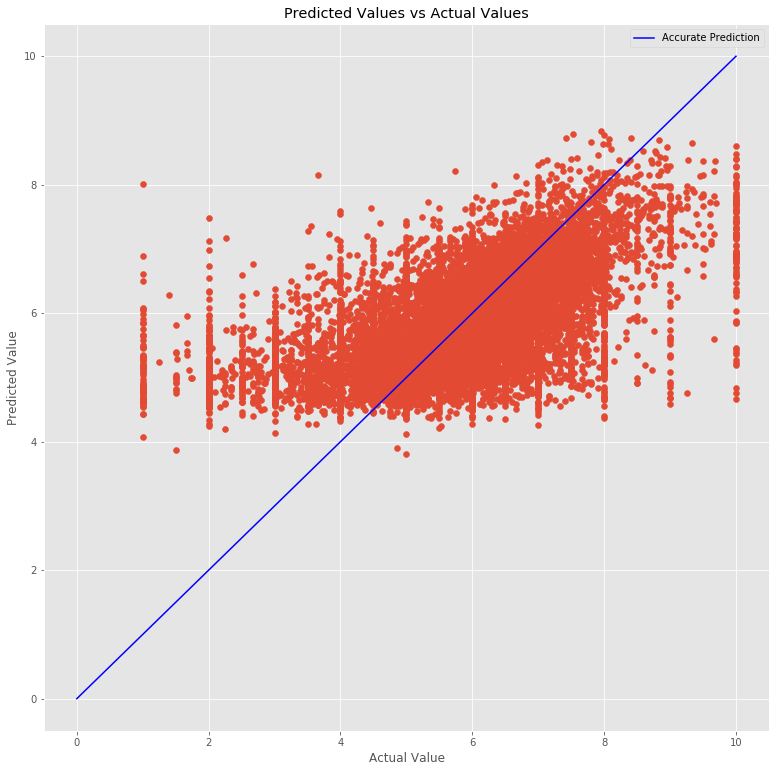

In [38]:
plt.figure(figsize=(13, 13))
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, 10, 6), np.linspace(0, 10, 6),
         color='Blue', label='Accurate Prediction')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.yticks(ticks=np.linspace(0, 10, 6))
plt.xticks(ticks=np.linspace(0, 10, 6))
plt.legend()
plt.title('Predicted Values vs Actual Values')